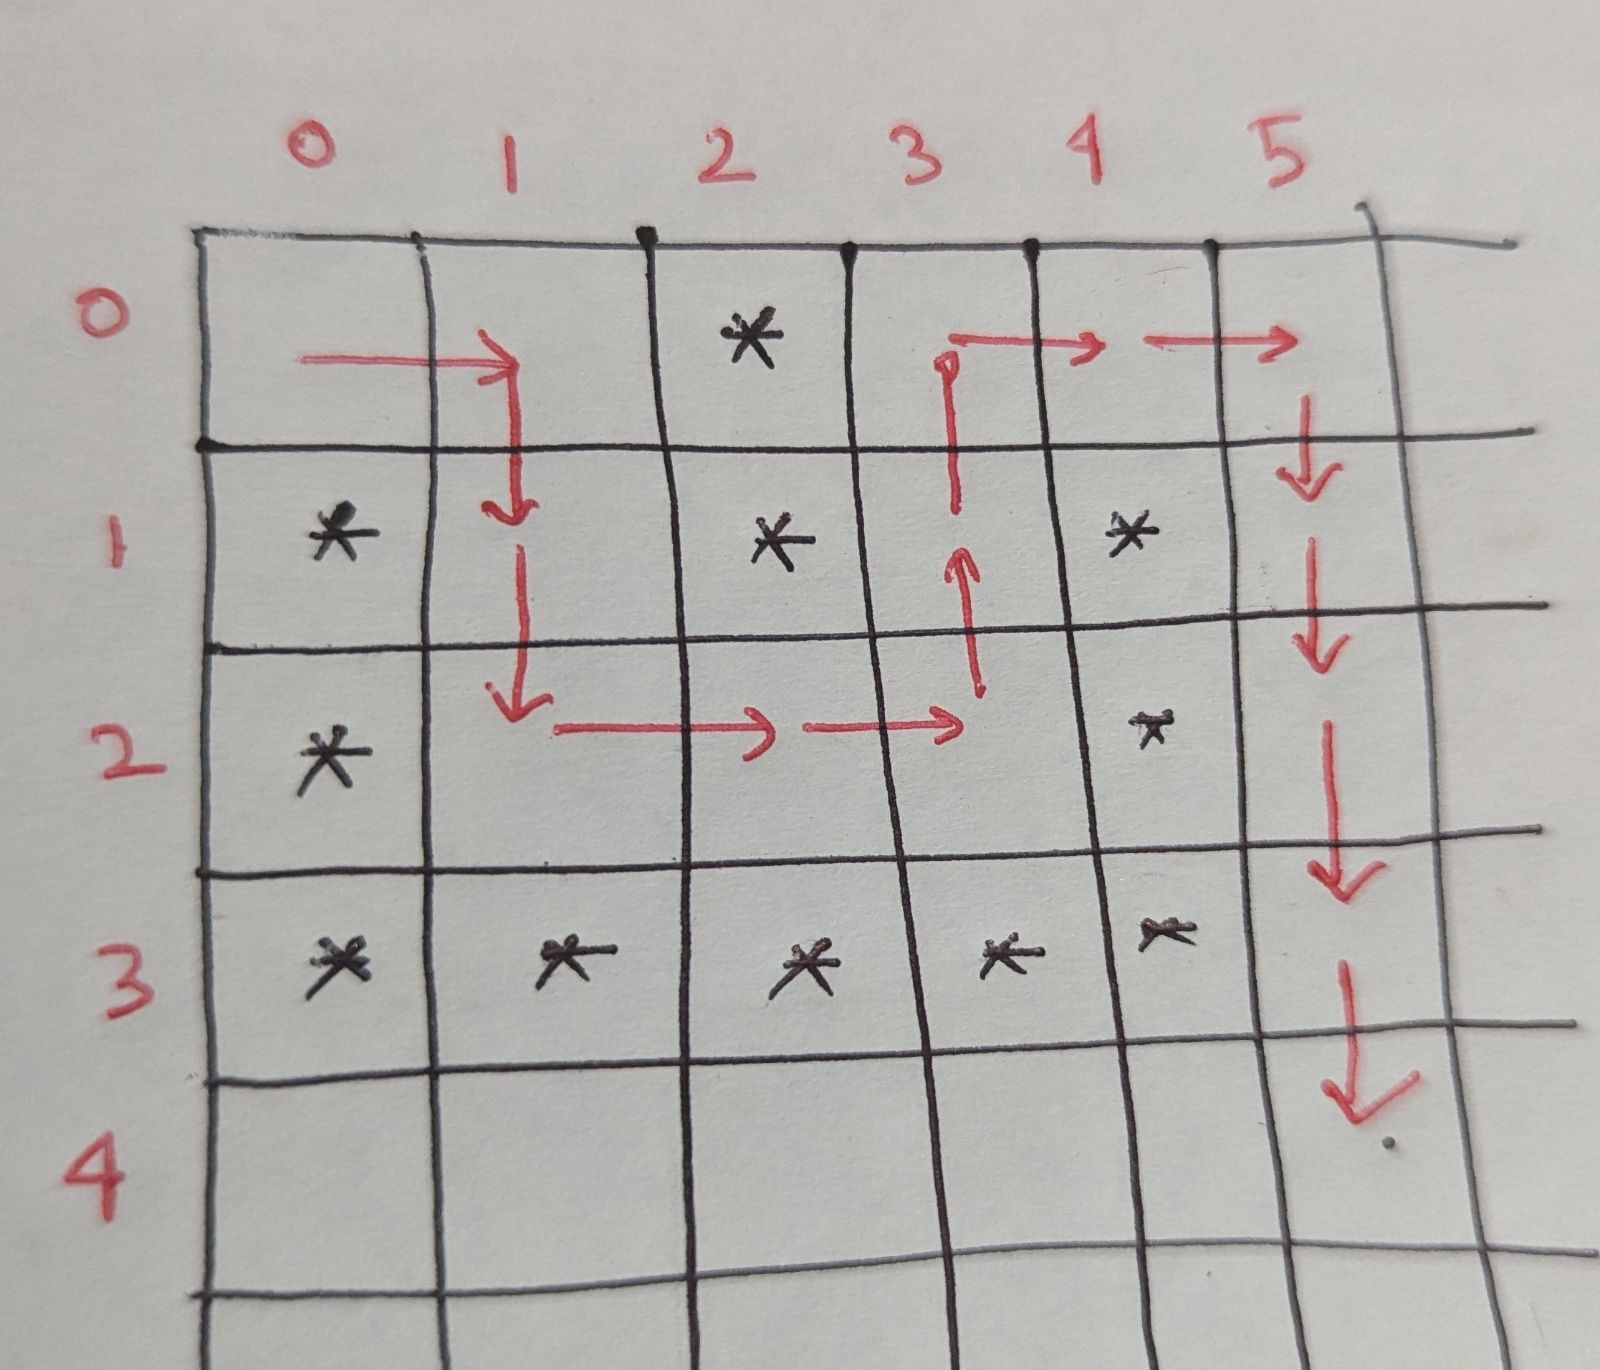

In [1]:
Graph = [
    '  *   ',
    '* * * ',
    '*   * ',
    '***** ',
    '      '
]
Heuristics = []
for i in range(len(Graph)):
  Heuristics.append([])
  for j in range(len(Graph[i])):
    Heuristics[i].append(abs(len(Graph) - i-1) + abs(len(Graph[i]) - j-1))

came_from = {}

g_score = []
for i in range(len(Graph)):
  g_score.append([])
  for j in range(len(Graph[i])):
    g_score[i].append(float('inf'))
g_score[0][0] = 0

f_score = []
for i in range(len(Graph)):
  f_score.append([])
  for j in range(len(Graph[i])):
    f_score[i].append(float('inf'))

f_score[0][0] = Heuristics[0][0]

from queue import PriorityQueue

pq = PriorityQueue()
pq.put((f_score[0][0], 0, 0))

while pq.empty() == False and (pq.queue[0][1] != len(Graph)-1 or pq.queue[0][2] != len(Graph[0])-1):
  item = pq.get()
  x = item[1]
  y = item[2]
  if x > 0 and Graph[x-1][y] != '*':
    temp_g_score = g_score[x][y] + 1
    temp_f_score = temp_g_score + Heuristics[x-1][y]
    if temp_f_score < f_score[x-1][y]:
      came_from[(x-1, y)] = (x, y)
      g_score[x-1][y] = temp_g_score
      f_score[x-1][y] = temp_f_score
      pq.put((temp_f_score, x-1, y))
  if x < len(Graph) -1 and Graph[x+1][y] != '*':
    temp_g_score = g_score[x][y] + 1
    temp_f_score = temp_g_score + Heuristics[x+1][y]
    if temp_f_score < f_score[x+1][y]:
      came_from[(x+1, y)] = (x, y)
      g_score[x+1][y] = temp_g_score
      f_score[x+1][y] = temp_f_score
      pq.put((temp_f_score, x+1, y))
  if y > 0 and Graph[x][y-1] != '*':
    temp_g_score = g_score[x][y] + 1
    temp_f_score = temp_g_score + Heuristics[x][y-1]
    if temp_f_score < f_score[x][y-1]:
      came_from[(x, y-1)] = (x, y)
      g_score[x][y-1] = temp_g_score
      f_score[x][y-1] = temp_f_score
      pq.put((temp_f_score, x, y-1))
  if y < len(Graph[0])-1 and Graph[x][y+1] != '*':
    temp_g_score = g_score[x][y] + 1
    temp_f_score = temp_g_score + Heuristics[x][y+1]
    if temp_f_score < f_score[x][y+1]:
      came_from[(x, y+1)] = (x, y)
      g_score[x][y+1] = temp_g_score
      f_score[x][y+1] = temp_f_score
      pq.put((temp_f_score, x, y+1))


x = len(Graph) - 1
y = len(Graph[0]) - 1


ans = []
while x != 0 or y != 0:
  ans.append((x, y))
  x, y = came_from[(x, y)]
ans.append((0, 0))
ans.reverse()
print(ans)

[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (1, 3), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5)]
